# Software Rightsizing based on Usage Data

### Brief description of the scenario

#### Context
We too much code to maintain of which we don't know if we need it anymore. So we want to get rid of some parts of our code.

#### Approach
The idea is to measure the actual usage of our code base by using a code coverage tool. With this report, we hope to find opportunities in our code. The picture shows our plan to get those measurements:

![](image.png)

### Take a look at the raw dataset

In [1]:
!head ../dataset/jacoco.csv

GROUP,PACKAGE,CLASS,INSTRUCTION_MISSED,INSTRUCTION_COVERED,BRANCH_MISSED,BRANCH_COVERED,LINE_MISSED,LINE_COVERED,COMPLEXITY_MISSED,COMPLEXITY_COVERED,METHOD_MISSED,METHOD_COVERED
JaCoCo Coverage Report,org.springframework.samples.petclinic,PetclinicInitializer,0,124,0,0,0,24,0,8,0,8
JaCoCo Coverage Report,org.springframework.samples.petclinic.model,NamedEntity,3,10,0,0,1,4,1,3,1,3
JaCoCo Coverage Report,org.springframework.samples.petclinic.model,Specialty,0,3,0,0,0,1,0,1,0,1
JaCoCo Coverage Report,org.springframework.samples.petclinic.model,PetType,0,3,0,0,0,1,0,1,0,1
JaCoCo Coverage Report,org.springframework.samples.petclinic.model,Vets,14,0,2,0,4,0,3,0,2,0
JaCoCo Coverage Report,org.springframework.samples.petclinic.model,Visit,0,29,0,0,0,12,0,7,0,7
JaCoCo Coverage Report,org.springframework.samples.petclinic.model,BaseEntity,0,17,0,2,0,5,0,5,0,4
JaCoCo Coverage Report,org.springframework.samples.petclinic.model,Person,0,17,0,0,0,7,0,5,0,5
JaCoCo Coverage Report,org.springframework

### Read in data from a usage measurement using JaCoCo

In [2]:
import pandas as pd
coverage = pd.read_csv("../dataset/jacoco_demo.csv")
coverage.head()

,PACKAGE,CLASS,LINE_MISSED,LINE_COVERED
0,org.springframework.samples.petclinic,PetclinicInitializer,0,24
1,org.springframework.samples.petclinic.model,NamedEntity,1,4
2,org.springframework.samples.petclinic.model,Specialty,0,1
3,org.springframework.samples.petclinic.model,PetType,0,1
4,org.springframework.samples.petclinic.model,Vets,4,0


### Calculate new measures needed for analysis

In [3]:
coverage['lines'] = coverage['LINE_COVERED'] + coverage['LINE_MISSED']
coverage['ratio'] = coverage['LINE_COVERED'] / coverage['lines']
coverage.head()

,PACKAGE,CLASS,LINE_MISSED,LINE_COVERED,lines,ratio
0,org.springframework.samples.petclinic,PetclinicInitializer,0,24,24,1.0
1,org.springframework.samples.petclinic.model,NamedEntity,1,4,5,0.8
2,org.springframework.samples.petclinic.model,Specialty,0,1,1,1.0
3,org.springframework.samples.petclinic.model,PetType,0,1,1,1.0
4,org.springframework.samples.petclinic.model,Vets,4,0,4,0.0


### Set up data for explorative analysis

In [4]:
coverage['fqn'] = coverage['PACKAGE'] + "." + coverage['CLASS']
coverage = coverage.set_index("fqn")
coverage.head()

,PACKAGE,CLASS,LINE_MISSED,LINE_COVERED,lines,ratio
fqn,,,,,,
org.springframework.samples.petclinic.PetclinicInitializer,org.springframework.samples.petclinic,PetclinicInitializer,0,24,24,1.0
org.springframework.samples.petclinic.model.NamedEntity,org.springframework.samples.petclinic.model,NamedEntity,1,4,5,0.8
org.springframework.samples.petclinic.model.Specialty,org.springframework.samples.petclinic.model,Specialty,0,1,1,1.0
org.springframework.samples.petclinic.model.PetType,org.springframework.samples.petclinic.model,PetType,0,1,1,1.0
org.springframework.samples.petclinic.model.Vets,org.springframework.samples.petclinic.model,Vets,4,0,4,0.0


### Create a visualization for exploration

In [5]:
import hotspotsviz
hotspotsviz.create(coverage, "ratio", "lines", ".")

### Group by packages to explore mean coverage on a higher level

In [6]:
grouped_by_packages = coverage.groupby("PACKAGE").sum()
grouped_by_packages

,CLASS,LINE_MISSED,LINE_COVERED,lines,ratio
PACKAGE,,,,,
org.springframework.samples.petclinic,PetclinicInitializer,0,24,24,1.000000
org.springframework.samples.petclinic.model,NamedEntitySpecialtyPetTypeVetsVisitBaseEntity...,33,75,108,7.390476
org.springframework.samples.petclinic.repository.jdbc,JdbcVisitRowMapperJdbcPetRepositoryImplJdbcVet...,150,0,150,0.000000
org.springframework.samples.petclinic.repository.jpa,JpaVisitRepositoryImplJpaOwnerRepositoryImplJp...,7,21,28,2.766234
org.springframework.samples.petclinic.service,ClinicServiceImpl,2,16,18,0.888889
org.springframework.samples.petclinic.util,EntityUtilsCallMonitoringAspect,17,13,30,0.541667
org.springframework.samples.petclinic.web,OwnerControllerPetTypeFormatterPetControllerPe...,40,75,115,4.478662


### Visualize coverage distribution over all packages

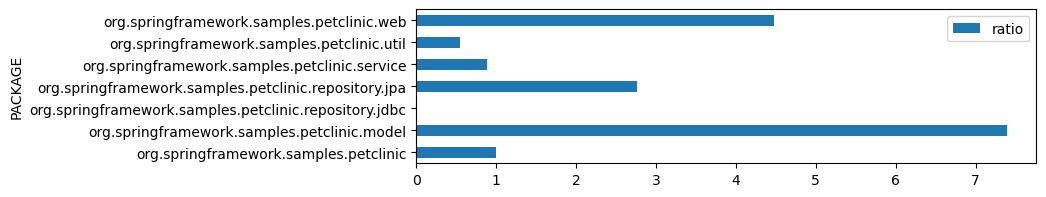

In [7]:
%matplotlib inline
grouped_by_packages[['ratio']].plot(kind="barh", figsize=(8,2));

### Conclusion
TODO: Get rid of the `jdbc`-Package